# <center> Random forest </center>

Leo Breiman found a use for bootstrap not only in statistics, but also in machine learning. He, together with Adele Cutler, improved the random forest algorithm proposed by [Ho](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf), adding to the original version the construction of uncorrelated trees based on CART, combined with the method of random subspaces and bagging.

Decision trees are a good family of basic classifiers for bagging because they are quite complex and can achieve zero error on any sample. The random subspace method allows reducing the correlation between trees and avoiding overfitting. Basic algorithms are trained on various features subsets, which are also randomly selected.
An ensemble of models using the random subspace method can be built using the following algorithm:
1. Let the number of objects for training be $\large N$, and the number of features $\large D$.
2. Choose $\large L$ as the number of distinct models in the ensemble.
3. For each individual $\large l$ model, select $\large dl (dl < D)$ as the number of features for $\large l$ . Usually only one $\large dl$ value is used for all models.
4. For each individual $\large l$ model, create a training sample by selecting $\large dl$ features from $\large D$ with replacement and train the model.

Now, to apply the ensemble model to a new object, combine the results of the individual $\large L$ models by majority vote or by combining the posterior probabilities.


### Algorithm

The algorithm for constructing a random forest consisting of $\large N$ trees is as follows:
* For each $\large n = 1, \dots, N$:
     * Generate $\large X_n$ selections using bootstrap.
     * Construct $\large b_n$ decision tree from $\large X_n$ sample:
         - according to a given criterion, we choose the best feature, make a split in the tree according to it, and so on until the selection is exhausted
         — the tree is built until there are no more than $\large n_\text{min}$ objects in each leaf or until we reach a certain depth of the tree
         — at each partition, $\large m$ random features are first selected from $\large n$ initial features,
         and the optimal split of the sample is sought only among them.
         
The final classifier $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$, in simple words - for the cassification problem, we choose the solution by majority voting, and in the regression problem - mean.

It is recommended to take $\large m = \sqrt{n}$ as max features in classification problems, and $\large m = \frac{n}{3}$ in regression problems, where $\large n$ is the number of features. 

Thus, a random forest is bagging over decision trees, in the course of which, for each partition, features are selected from some random subset of features.

### Comparison with decision tree and bagging

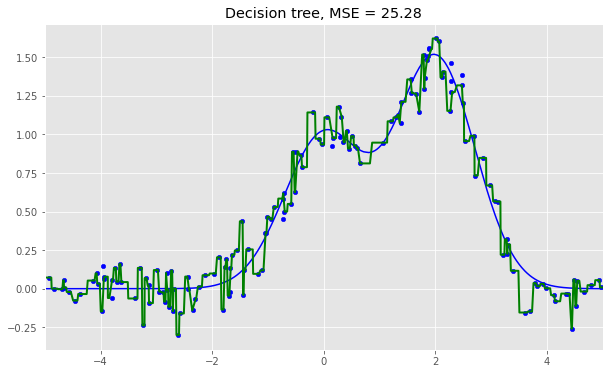

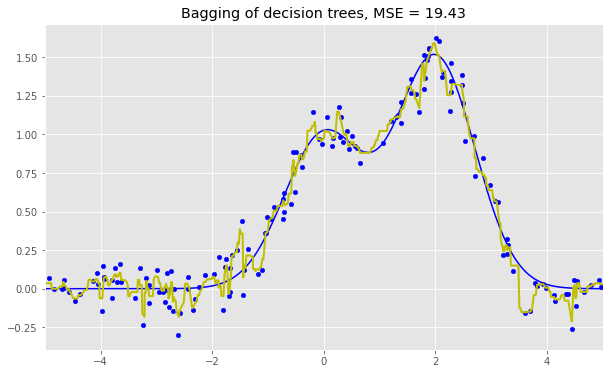

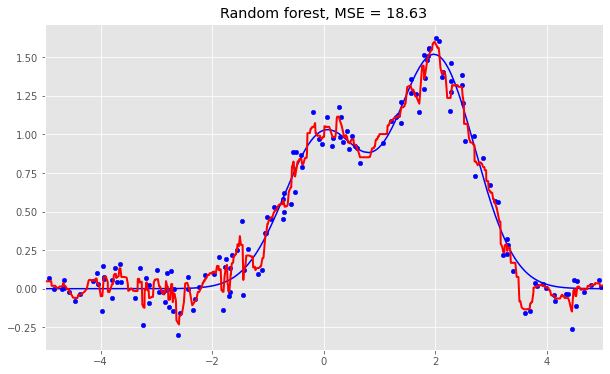

In [ ]:
from __future__ import division, print_function
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

     
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

# One decision tree regressor
dtree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

# Bagging decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor(random_state=42), random_state=42).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Bagging of decision trees, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

# Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

As we can see from the graphs and MSE error values, a random forest of 10 trees gives a better result than a single tree or bagging of 10 decision trees. The main difference between random forest and decision tree bagging is that in a random forest, a random subset of features is selected from a random number, and the best feature to split a node is determined from the subset of features, unlike bagging, where all features are considered for splitting at a node.

You can also see the advantage of random forest and bagging in classification problems.

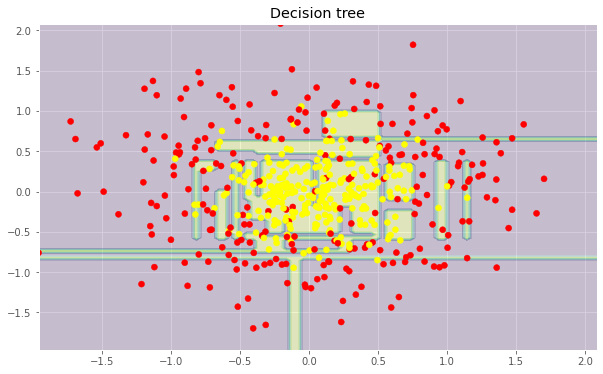

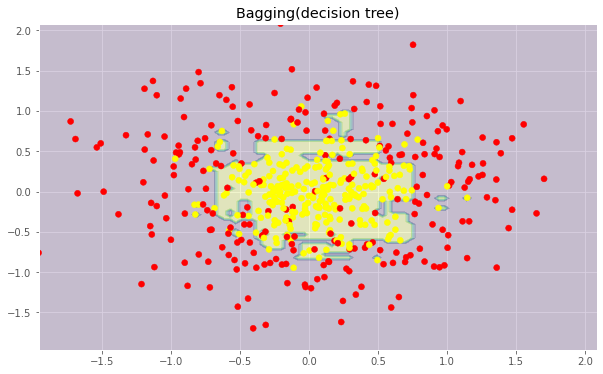

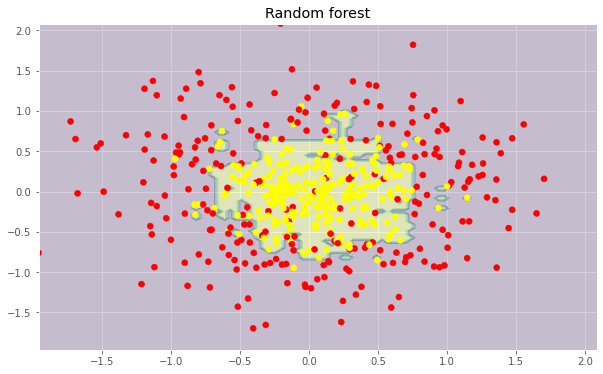

In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap="autumn")
plt.title("Decision tree")
plt.show()

b_dtree = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap="autumn")
plt.title("Bagging(decision tree)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap="autumn")
plt.title("Random forest")
plt.show()

In the graphs above, it can be seen that the separating boundary of the decision tree is very “torn” and has many sharp corners, which indicates overfitting and poor generalizing ability. While bagging and random forest have a fairly smoothed border and there are practically no signs of overfitting.

Let's now try to figure out the parameters by selecting which we can increase the proportion of correct answers.

### Options


The random forest method is implemented in the machine learning library [scikit-learn](http://scikit-learn.org/stable/) by two classes RandomForestClassifier and RandomForestRegressor.

Full list of random forest parameters for the regression problem:

```
class sklearn.ensemble.RandomForestRegressor(
    n_estimators — number of trees in the "forest" (default - 10)
    criterion — a function that measures the quality of splitting a tree branch (by default - "mse" , you can also choose "mae")
    max_features — The number of features to consider when looking for the best split. You can specify a specific number or percentage of features, or choose from the available values: "auto" (all features), "sqrt", "log2". The default is "auto".
    max_depth — The maximum depth of the tree. If None, then nodes are expanded until perfect split or until all leaves contain less than min_samples_split samples.
    min_samples_split — the minimum number of objects required to split an internal node. Can be set as a number or percentage of the total number of objects (default is 2)
    min_samples_leaf — the minimum number of objects in a leaf. Can be set as a number or percentage of the total number of objects (default - 1)
    min_weight_fraction_leaf - the minimum weighted fraction of the total sum of weights (of all input features) must be in the leaf (they have the same weight by default)
    max_leaf_nodes - the maximum number of leaves (there is no limit by default)
    min_impurity_split - threshold for stopping tree growth (default 1e-7)
    bootstrap - whether to use bootstrap to build a tree (by default True)
    oob_score - whether to use out-of-bag objects for R^2 score (by default False)
    n_jobs - the number of cores for training a model and making predictions (by default 1, if you set -1, then all cores will be used)
    random_state - the initial value for generating random numbers (by default it is not set, if you want reproducible results, then you need to specify any number of type int)
     verbose - print logs for building trees (default 0)
     warm_start - uses an already trained model and adds trees to the ensemble (default is False)
)
```

For the classification problem, everything is almost the same, we will give only those parameters that RandomForestClassifier differs from RandomForestRegressor

```
class sklearn.ensemble.RandomForestClassifier(
    criterion - since we now have a classification task, the criterion "gini" is selected by default (you can choose "entropy")
    class_weight - the weight of each class (by default, all weights are equal to 1, but you can pass a dictionary with weights, or explicitly specify "balanced", then the weights of the classes will be equal to their original parts in the general population; you can also specify "balanced_subsample", then the weights on each subsample will change depending on the distribution of classes on this subsample.
```

Next, consider a few parameters that you should first pay attention to when training a model:
- n_estimators 
- criterion
- max_features 
- min_samples_leaf 
- max_depth

**Let's look at the usage of a random forest in a real problem**

To do this, we will use an example with the fraud detection task. This is a classification task, so we will use the accuracy metric to evaluate predictions. First, let's build the simplest classifier, which will be our baseline. Let's take only numerical features for simplification.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/drive/MyDrive/projector_course_data/telecom_churn.csv")

# choose only numerical features
features = []
for column in df.columns:
    if (df[column].dtype == "float64") or (df[column].dtype == 'int64'):
        features.append(column)
        
# split on features and label
X, y = df[features].copy(), np.asarray(df["Churn"],dtype='int8')

# set validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# initialize our classifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# train model
results = cross_val_score(rfc, X, y, cv=skf)

# Estimate accuracy
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 92.35%


We got an accuracy of 92.35%, now let's try to improve this result and look at how the learning curves behave when the main parameters are changed.

Let's start with the number of trees:

In [ ]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100, 200, 300]

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.56% with 200 trees


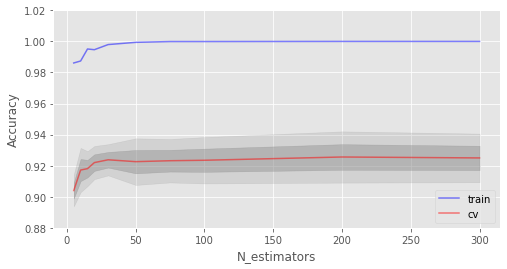

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

As you can see, when a certain number of trees is reached, our accuracy on the test goes to the asymptote, and you can decide for yourself how many trees are optimal for your task. The figure also shows that we were able to achieve 100% accuracy on the training set, which tells us that our model was overfitting. To avoid overfitting, we must add regularization parameters to the model.

Let's start with the maximum depth parameter - max_depth. (fix the number of trees 100)

Best accuracy on CV is 92.65% with 17 max_depth


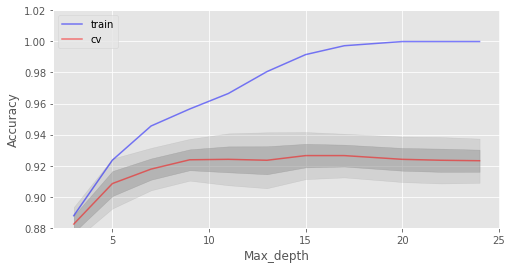

In [ ]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

The `max_depth` parameter does a good job of regularizing the model, and we don't overfit as much anymore. The accuracy of our model has improved slightly.

Another important parameter is `min_samples_leaf`, it also performs the function of a regularizer.

In [ ]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.41% with 3 min_samples_leaf


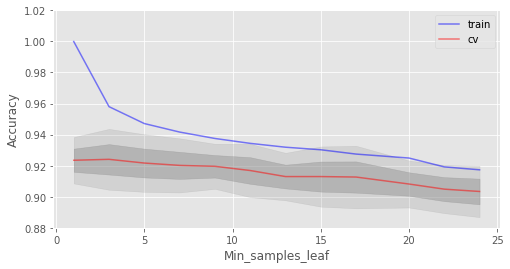

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

In this case, we do not improve accuracy on validation, but we can greatly reduce overfitting to 3% while maintaining an accuracy of about 92.5%.

Let's consider such parameter as `max_features`. For classification problems, $\large \sqrt{n}$ is used by default, where n is the number of features. Let's check whether it is optimal in our case to use 4 features or not.

Best accuracy on CV is 92.65% with 6 max_features


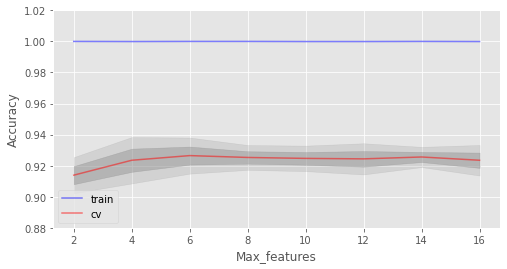

In [ ]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

In our case, the optimal number of features is 6, with this value the best result is achieved.

We have considered how learning curves behave depending on the change in the main parameters. Let's now use `GridSearch` to find the optimal parameters for our example.

In [ ]:
parameters = {"max_features": [4, 7, 10, 13], "min_samples_leaf": [1, 3, 5, 7], "max_depth": [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [ ]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(max_depth=10, max_features=10, n_jobs=-1,
                        random_state=42), 0.9276893084989037)

The best accuracy we could achieve with parameter iteration is 92.70% with `'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1`.

### Variation and decorrelation effect

Let's write the random forest variation as $$ \large Varf(x) = \rho(x)\sigma^2(x) $$
Here
- $\large \rho(x)$ - sample correlation between any two trees used in averaging
$$\large \rho(x) = corr[T(x;\Theta_1(Z)),T(x_2,\Theta_2(Z))],$$ where $\large \Theta_1(Z)$ and $\large \Theta_2(Z)$ - a randomly selected pair of trees on randomly selected sample objects Z
- $ \large \sigma^2(x)$ is the sample variance of any arbitrarily chosen tree: $$ \large \sigma^2(x) = VarT(x;\Theta(X))$$

It is easy to confuse $\large\rho(x)$ with the average correlation between trained trees in a given random forest by treating the trees as N-vectors and calculating the average pairwise correlation between them. This is not the case. This conditional correlation is not directly related to the averaging process, and the dependence on $ \large x$ in $ \large \rho(x)$ alerts us to this difference. Rather, $ \large \rho(x)$ is a theoretical correlation between a pair of random trees evaluated in the object $ \large x$, which was caused by repeatedly sampling the training sample from the population $ \large Z $, and after that the given pair of random trees is chosen.

In fact, the conditional covariance of a pair of trees is 0 because the bootstrap and feature selection are independent and equally distributed.

If we consider the variance for one tree, then it practically does not change from the features for separation ($ \large m $), but for an ensemble this plays a big role, and the variance for a tree is much higher than for an ensemble.
The book *The Elements of Statistical Learning (Trevor Hastie, Robert Tibshirani and Jerome Friedman)* has a great example that demonstrates this.
![image](https://github.com/terpiljenya/machine_learning_projector/blob/main/pictures/variance_rf.png?raw=1)

### Bias

As in bagging, the bias in the random forest is the same as the bias in a single tree $ \large T(x,\Theta(Z))$
$$ \large \begin{array}{rcl} Bias &=& \mu(x) - E_Zf_{rf}(x) \\
&=& \mu(x) - E_ZE_{\Theta | Z}T(x,\Theta(Z))\end{array}$$
It is also usually larger (in absolute terms) than the "unprunned" tree bias, since randomization and sample space reduction impose limitations. Therefore, the prediction improvements obtained with bagging or random forests are solely the result of variance reduction.

### Extra random trees

In Extremely Randomized Trees, there is more randomness in how node splits are calculated. As with random forests, a random subset of possible features is used, but instead of searching for the most optimal thresholds, thresholds are randomly chosen for each possible feature, and the best of these randomly generated thresholds is chosen as the best rule for splitting a node. This usually allows you to slightly reduce the variance of the model at the expense of slightly increasing the bias.

The scikit-learn library has an implementation of [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) ​​and [ExtraTreesRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor). This method should be used when you are heavily overfitting on random forest or gradient boosting.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
parameters = {"max_features": [4, 7, 10, 13], "min_samples_leaf": [1, 3, 5, 7], "max_depth": [5,10,15,20]}
etc = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gcv = GridSearchCV(etc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [ ]:
gcv.best_estimator_, gcv.best_score_

(ExtraTreesClassifier(max_depth=20, max_features=13, min_samples_leaf=3,
                      n_jobs=-1, random_state=42), 0.929786908347628)

### Random forest similarity to k-nearest neighbors

The random forest method is similar to the nearest neighbor method. Random forests essentially make feature predictions based on the labels of similar features from training. The similarity of objects is the higher, the more often these objects appear in the same leaf of the tree. Let's show it formally.

Consider a regression problem with a quadratic loss function. Let $ \large T_n(x) $ be the number of the leaf of the nth tree from the random forest that contains the object $ \large x $ . The answer of the $ \large x $ object is equal to the average answer for all objects of the training sample that are in this leaf $ \large T_n(x) $. It can be written like this
$$ \large b_n(x) = \sum_{i=1}^{l}w_n(x,x_i)y_i,$$
where $$ \large w_n(x, x_i) = \frac{[T_n(x) = T_n(x_i)]}{\sum_{j=1}^{l}[T_n(x) = T_n(x_j)] }$$
Then the composition answer is $$ \large \begin{array}{rcl} a_n(x) &=& \frac{1}{N}\sum_{n=1}^{N}\sum_{i=1}^{l}w_n(x,x_i)y_i \\
&=& \sum_{i=1}^{l}\Big(\frac{1}{N}\sum_{j=1}^{N}w_n(x,x_j)\Big)y_i \end{array}$$
It can be seen that the response of the random forest is the sum of the responses of all learning objects with some weights. Note that the number of the leaf $ \large T_n(x)$ where the object is located is a valuable feature in itself. The approach works quite well, in which a composition of a small number of trees is trained on a sample using a random forest or gradient boosting, and then categorical features $ \large T_1(x), \dots, T_n(x) $ are added to it. New features are the result of a non-linear division of space and carry information about the similarity of objects.

In the same book *The Elements of Statistical Learning* there is a good visual example of the similarity of a random forest and k-nearest neighbors.

![image](https://github.com/terpiljenya/machine_learning_projector/blob/main/pictures/knn_vs_rf.png?raw=1)

### Convert features to multidimensional space

Everyone is used to apply random forest for supervised learning problems, but it is also possible to do unsupervised learning. Using the [RandomTreesEmbedding](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html#sklearn.ensemble.RandomTreesEmbedding) method, we can transform our dataset into a multidimensional sparse representation of it. Its essence is that we build absolutely random trees, and we consider the index of the leaf in which the observation turned out to be a new sign. If an object got into the first leaf, then we put 1, and if it didn’t, then 0. The so-called binary coding. We can control the number of variables and also the sparsity of our new dataset representation by increasing/decreasing the number of trees and their depth. Because adjacent data points are likely to lie on the same leaf of the tree, the transformation performs an implicit, nonparametric density estimate.

**Pros**:
 - has a high prediction accuracy, on most tasks it will be better than linear algorithms; accuracy comparable to boosting accuracy
 - practically insensitive to outliers in data due to random sampling
 - insensitive to scaling (and in general to any monotone transformations) of feature values, due to the choice of random subspaces
 - does not require careful setting of parameters, works well out of the box. With the help of "tuning" the parameters, it is possible to achieve an increase from 0.5 to 3% of accuracy, depending on the task and data.
 - able to efficiently process data with a large number of features and classes
 - handles both continuous and discrete features equally well
 - rarely retrained, in practice, adding trees almost always only improves the composition, but on validation, after reaching a certain number of trees, the learning curve goes to the asymptote
 - for a random forest, there are methods for estimating the significance of individual features in the model
 - works well with missing data; retains good accuracy if most of the data is missing
 - implies the ability to balance the weight of each class on the entire sample, or on a subsample of each tree
 - calculates proximity between feature pairs that can be used in clustering, outlier detection, or (by scaling) give interesting data representations
 - the possibilities described above can be extended to unlabeled data, which leads to the ability to do clustering and visualization of data, detect outliers
 - high parallelizability and scalability.
 
**Cons**:
 - unlike a single tree, random forest results are more difficult to interpret
 - no formal inferences (p-values) available to assess the importance of variables
 - the algorithm works worse than many linear methods, when there are a lot of sparse features in the sample (texts, Bag of words)
 - a random forest cannot extrapolate, unlike the same linear regression (but this can also be considered a plus, since there will be no extreme values ​​in case of an outlier)
 - the algorithm is prone to overfitting on some tasks, especially on noisy data
 - for data that includes categorical variables with different number of levels, random forests are biased in favor of features with a large number of levels: when a feature has many levels, the tree will adjust more precisely to these features, since higher accuracy can be obtained on them
 - if the data contains groups of correlated features that have similar significance for labels, then preference is given to small groups over large ones
 - the larger size of the resulting models. It takes $O(NK)$ of memory to store the model, where $K$ is the number of trees.

**Homework:**

1. Use any binary classification dataset
2. Define validation strategy and use it for all next steps without changes
3. Train decision tree model and estimate performance on validation
4. Train bagging model with decision tree as a base model and estimate performance on validation
5. Write your own bagging implementation: 
  5.1. Define init for our CustomBaggingClassifier 
  5.2. Write fit as described in lecture: divide train data on n parts (n_estimators in CustomBaggingClassifier), train base_estimator on each part and save these models inside class 
  5.3. For predictions we should use all saved models and combine their predictions (as voting)
6. Compare performance of sklearn bagging model and random forest with your own implementation

Example of CustomBaggingClassifier class:
```
class CustomBaggingClassifier:
    def __init__(self, base_estimator, n_estimators, max_samples, max_features):
        ...
  
    def fit(X, y):
        ...
        
    def predict(X):
        ...
```